In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Useful functions
---

In [2]:
def display_svg(data):
    from IPython.display import SVG, display
    display(SVG(data))

In [3]:
def export_svg(data, filename):
    f = open(f'{filename}.svg', "w")
    f.write(data)
    f.close()

# Build SVG
---

In [4]:
WIDTH = 360
HEIGHT = 480

In [5]:
SVG = '<?xml version="1.0" encoding="utf-8"?>\n'
SVG += '<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n'

In [6]:
SVG += f'<svg id="image" width="{WIDTH}px" height="{HEIGHT}px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">'

## References definition
---

In [7]:
SVG += '''

  <defs>
    <!-- ! Gradients -->
    <linearGradient id="BG-grad1" x1="0%" y1="0%" x2="0%" y2="100%">
      <stop offset="0%" stop-color="rgb(0,0,0)" stop-opacity="1" />
      <stop offset="50%" stop-color="rgb(5,15,30)" stop-opacity="1" />
      <stop offset="100%" stop-color="rgb(20,40,60)" stop-opacity="1" />
    </linearGradient>
    <radialGradient id="BG-grad2" cx="250" cy="100" r="150" gradientUnits="userSpaceOnUse">
      <stop offset="0%" stop-color="rgb(255,255,255)" stop-opacity="1" />
      <stop offset="100%" stop-color="rgb(0,0,0)" stop-opacity="1" />
    </radialGradient>
    <radialGradient id="BH-grad1" cx="0.5" cy="0.5" r="0.5">
      <stop offset="0%" stop-color="rgb(0,0,0)" stop-opacity="1" />
      <stop offset="100%" stop-color="rgb(30,30,30)" stop-opacity="1" />
    </radialGradient>
    <radialGradient id="planet-umbra" cx="0.25" cy="0.65" r="0.7">
      <stop offset="0%" stop-color="rgb(0,0,0)" stop-opacity="1" />
      <stop offset="90%" stop-color="rgb(80,60,40)" stop-opacity="1" />
      <stop offset="100%" stop-color="rgb(255,255,255)" stop-opacity="1" />
    </radialGradient>
    <radialGradient id="planet-atm" cx="1" cy="0.25" r="1">
      <stop offset="0%" stop-color="rgb(255,200,180)" stop-opacity="1" />
      <stop offset="30%" stop-color="rgb(100,130,150)" stop-opacity="1" />
      <stop offset="100%" stop-color="rgb(10,20,30)" stop-opacity="1" />
    </radialGradient>
    <!-- ! Filters -->
    <filter id="BH-photo-ring-red" x="-20%" y="-20%" width="140%" height="140%">
      <feGaussianBlur stdDeviation="3 3" in="SourceGraphic" edgeMode="none" result="blur1" />
      <feTurbulence type="turbulence" baseFrequency="0.1" numOctaves="2" seed="1" stitchTiles="stitch" result="turbulence1" />
      <feOffset in="turbulence1" result="turbulence-dy1">
        <animate attributeName="dy" values="0;-83" dur="10s" repeatCount="indefinite" />
      </feOffset>
      <feOffset in="turbulence1" result="turbulence-dy2">
        <animate attributeName="dy" values="83;0" dur="10s" repeatCount="indefinite" />
      </feOffset>
      <feMerge result="merge1">
        <feMergeNode in="turbulence-dy1" />
        <feMergeNode in="turbulence-dy2" />
      </feMerge>
      <feComposite in="merge1" in2="blur1" operator="in" result="composite1" />
      <feColorMatrix
        type="matrix" 
        values="1 0 0 0 0
                0 1 0 0 0
                0 0 1 0 0
                0 0 0 60 -4" 
        in="composite"
        result="colormatrix1"/>
      <feFlood flood-color="rgb(255,0,55)" flood-opacity="1" result="flood1" />
      <feComposite in="flood1" in2="colormatrix1" operator="in" result="composite2" />
      <feGaussianBlur stdDeviation="3 3" in="composite2" edgeMode="none" result="blur2" />
      <feColorMatrix
        type="matrix" 
        values="1 0 0 0 0
                0 1 0 0 0
                0 0 1 0 0
                0 0 0 15 -6" 
        in="blur2"
        result="colormatrix2" />
    </filter>
    <filter id="BH-photo-ring-green" x="-20%" y="-20%" width="140%" height="140%">
      <feGaussianBlur stdDeviation="3 3" in="SourceGraphic" edgeMode="none" result="blur1" />
      <feTurbulence type="turbulence" baseFrequency="0.1" numOctaves="2" seed="2" stitchTiles="stitch" result="turbulence1" />
      <feOffset in="turbulence1" result="turbulence-dy1">
        <animate attributeName="dy" values="0;-83" dur="10s" repeatCount="indefinite" />
      </feOffset>
      <feOffset in="turbulence1" result="turbulence-dy2">
        <animate attributeName="dy" values="83;0" dur="10s" repeatCount="indefinite" />
      </feOffset>
      <feMerge result="merge1">
        <feMergeNode in="turbulence-dy1" />
        <feMergeNode in="turbulence-dy2" />
      </feMerge>
      <feComposite in="merge1" in2="blur1" operator="in" result="composite1" />
      <feColorMatrix
        type="matrix" 
        values="1 0 0 0 0
                0 1 0 0 0
                0 0 1 0 0
                0 0 0 60 -4" 
        in="composite"
        result="colormatrix1"/>
      <feFlood flood-color="rgb(55,255,0)" flood-opacity="1" result="flood1" />
      <feComposite in="flood1" in2="colormatrix1" operator="in" result="composite2" />
      <feGaussianBlur stdDeviation="3 3" in="composite2" edgeMode="none" result="blur2" />
      <feColorMatrix
        type="matrix" 
        values="1 0 0 0 0
                0 1 0 0 0
                0 0 1 0 0
                0 0 0 15 -6" 
        in="blur2"
        result="colormatrix2" />
    </filter>
    <filter id="BH-photo-ring-blue" x="-20%" y="-20%" width="140%" height="140%">
      <feGaussianBlur stdDeviation="3 3" in="SourceGraphic" edgeMode="none" result="blur1" />
      <feTurbulence type="turbulence" baseFrequency="0.1" numOctaves="2" seed="3" stitchTiles="stitch" result="turbulence1" />
      <feOffset in="turbulence1" result="turbulence-dy1">
        <animate attributeName="dy" values="0;-83" dur="10s" repeatCount="indefinite" />
      </feOffset>
      <feOffset in="turbulence1" result="turbulence-dy2">
        <animate attributeName="dy" values="83;0" dur="10s" repeatCount="indefinite" />
      </feOffset>
      <feMerge result="merge1">
        <feMergeNode in="turbulence-dy1" />
        <feMergeNode in="turbulence-dy2" />
      </feMerge>
      <feComposite in="merge1" in2="blur1" operator="in" result="composite1" />
      <feColorMatrix
        type="matrix" 
        values="1 0 0 0 0
                0 1 0 0 0
                0 0 1 0 0
                0 0 0 60 -4" 
        in="composite"
        result="colormatrix1"/>
      <feFlood flood-color="rgb(0,55,255)" flood-opacity="1" result="flood1" />
      <feComposite in="flood1" in2="colormatrix1" operator="in" result="composite2" />
      <feGaussianBlur stdDeviation="3 3" in="composite2" edgeMode="none" result="blur2" />
      <feColorMatrix
        type="matrix" 
        values="1 0 0 0 0
                0 1 0 0 0
                0 0 1 0 0
                0 0 0 15 -6"
        in="blur2"
        result="colormatrix2" />
    </filter>
    <filter id="BH-photo-ring-glow" x="-20%" y="-20%" width="140%" height="140%">
      <feGaussianBlur stdDeviation="15 3" in="SourceGraphic" edgeMode="none" result="blur1" />
      <feGaussianBlur stdDeviation="10 1" in="SourceGraphic" edgeMode="none" result="blur2" />
      <feBlend in="SourceGraphic" in2="blur1" mode="screen" result="blend1" />
      <feBlend in="SourceGraphic" in2="blur2" mode="screen" result="blend2" />
      <feMerge result="merge1">
        <feMergeNode in="blend1" />
        <feMergeNode in="blend2" />
      </feMerge>
    </filter>
    <filter id="planet-shader" x="-20%" y="-20%" width="140%" height="140%">
      <feTurbulence type="turbulence" baseFrequency="0.2" numOctaves="2" seed="3" stitchTiles="stitch" result="turbulence1" />
      <feOffset in="turbulence1" result="turbulence-dxA1">
        <animate attributeName="dx" values="42;0" dur="15" begin="-7" repeatCount="indefinite" />
      </feOffset>
      <feOffset in="turbulence1" result="turbulence-dxA2">
        <animate attributeName="dx" values="0;-42" dur="15" begin="-7" repeatCount="indefinite" />
      </feOffset>
      <feMerge result="mergeA">
        <feMergeNode in="turbulence-dxA1" />
        <feMergeNode in="turbulence-dxA2" />
      </feMerge>
      <feOffset in="turbulence1" result="turbulence-dxB1">
        <animate attributeName="dx" values="42;0" dur="15" begin="-13" repeatCount="indefinite" />
      </feOffset>
      <feOffset in="turbulence1" result="turbulence-dxB2">
        <animate attributeName="dx" values="0;-42" dur="15" begin="-13" repeatCount="indefinite" />
      </feOffset>
      <feMerge result="mergeB">
        <feMergeNode in="turbulence-dxB1" />
        <feMergeNode in="turbulence-dxB2" />
      </feMerge>
      <feColorMatrix
        type="matrix" 
        values="1 0 0 0 0
                0.3 0 0 0 0
                0 0 0 0 0
                0 0 0 20 -4"
        in="mergeA"
        result="colormatrixA" />
      <feColorMatrix
        type="matrix" 
        values="0 0.3 0 0 0
                0 1 0 0 0
                0 0 0 0 0
                0 0 0 20 -4"
        in="mergeB"
        result="colormatrixB" />
      <feFlood flood-color="rgb(100,120,150)" flood-opacity="1" result="flood1" />
      <feComposite in="flood1" in2="colormatrixA" result="compositeA" operator="arithmetic" k1="0" k2="1" k3="1" k4="0" />
      <feComposite in="compositeA" in2="colormatrixB" result="compositeB" operator="arithmetic" k1="0" k2="1" k3="1" k4="0" />
      <feComposite in="compositeB" in2="SourceAlpha" result="compositeC" operator="in" />
    </filter>
    <filter id="planet-atm-blur" x="-20%" y="-20%" width="140%" height="140%">
      <feGaussianBlur stdDeviation="1 1" in="SourceGraphic" edgeMode="none" result="blur1" />
    </filter>
    <!-- ! Symbols -->
    <!-- ! Patterns -->
  </defs>

'''

In [8]:
# Background colorization
SVG += '  <!-- ! Background gradients -->\n'
SVG += '  <rect id="BG" width="100%" height="100%" fill="url(#BG-grad1)" />\n'
SVG += '  <rect id="BG" width="100%" height="100%" fill="url(#BG-grad2)" style="mix-blend-mode: screen;" opacity="0.2" />\n\n'

## Fixed stars 01
---

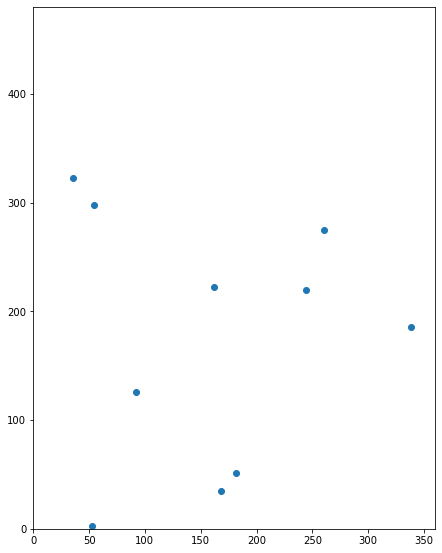

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(36/5, 48/5))

N = 10
np.random.seed(sum([ord(e) for e in list('Fixed Stars 01')]))
x = np.random.random(N)*WIDTH
y = np.random.random(N)*HEIGHT

ax.scatter(x, HEIGHT - y)
ax.set_xlim([0, WIDTH])
ax.set_ylim([0, HEIGHT])

plt.show()

In [10]:
SVG += '  <!-- ! Fixed stars 01 -->\n'
SVG += '  <g id="fixed-stars01">\n'

maxdur = 10

np.random.seed(sum([ord(e) for e in list('Fixed Stars 01')]))
for i in range(N):
    r = 0.75 + np.random.random()*0.75
    h = [0, 220][np.random.randint(2)] + np.random.random()*40 - 20
    SVG += f'    <circle cx="{x[i]:.02f}" cy="{y[i]:.02f}" r="{r:.02f}" fill="hsl({h:.02f}, 70%, 70%)">\n'
    offset = np.random.random()*maxdur
    SVG += f'      <animate attributeName="opacity" values="1;0.5;0.75;0.25;0.75;0.5;1" dur="{maxdur}s" begin="-{offset:.02f}s" repeatCount="indefinite" />\n'
    SVG += f'    </circle>\n'

SVG += '  </g>\n\n'

## Falling debris 01
---

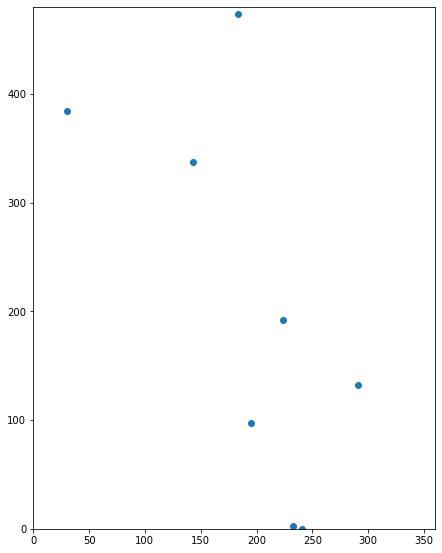

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(36/5, 48/5))

N = 8
np.random.seed(sum([ord(e) for e in list('Falling debris 01')]))
x = np.random.random(N)*WIDTH
y = np.random.random(N)*HEIGHT

ax.scatter(x, HEIGHT - y)
ax.set_xlim([0, WIDTH])
ax.set_ylim([0, HEIGHT])

plt.show()

In [12]:
SVG += '  <!-- ! Falling debris 01 -->\n'
SVG += '  <g id="falling-debris01">\n'

maxdur = 5

np.random.seed(sum([ord(e) for e in list('Falling debris 01')]))
for i in range(N):
    r = 0.75 + np.random.random()*0.75
    h = [0, 220][np.random.randint(2)] + np.random.random()*40 - 20
    SVG += f'    <circle cx="{x[i]:.02f}" r="{r:.02f}" fill="hsl({h:.02f}, 50%, 70%)">\n'
    po = np.random.random()*HEIGHT/2
    pi = HEIGHT + po
    dur = 1 + np.random.random()*(maxdur - 1)
    offset1 = dur*y[i]/HEIGHT
    SVG += f'      <animate attributeName="cy" values="-{po:.02f};{pi:.02f}" dur="{dur:.02f}s" begin="-{offset1:.02f}s" repeatCount="indefinite" />\n'
    offset2 = np.random.random()*4
    SVG += f'      <animate attributeName="opacity" values="1;0.5;0.75;0.25;0.75;0.5;1" dur="5s" begin="-{offset2:.02f}s" repeatCount="indefinite" />\n'
    SVG += f'    </circle>\n'

SVG += '  </g>\n\n'

## Black hole
---

In [13]:
cx = 250; cy = 100; r = 25

SVG += f'  <!-- ! Black hole -->\n'
SVG += f'  <g id="bh-photon-ring">\n'
SVG += f'    <circle cx="{cx}" cy="{cy}" r="{r}" style="filter: url(#BH-photo-ring-red); mix-blend-mode: screen;" />\n'
SVG += f'    <circle cx="{cx}" cy="{cy}" r="{r}" style="filter: url(#BH-photo-ring-green); mix-blend-mode: screen;" />\n'
SVG += f'    <circle cx="{cx}" cy="{cy}" r="{r}" style="filter: url(#BH-photo-ring-blue); mix-blend-mode: screen;" />\n'
SVG += f'    <circle cx="{cx}" cy="{cy}" r="{r}" fill="url(#BH-grad1)" stroke="white" stroke-width="1" />\n'
SVG += f'  </g>\n\n'

In [14]:
def disk01(SVG, cx, cy, R, r_, s_, t_):
    W = np.linspace(0, 2*np.pi, 5)
    S = cx + R*np.cos(W[1:] - np.pi/2)
    T = cy + R*np.sin(W[1:] - np.pi/2)
    for j, (r, si, ti) in enumerate(zip(R, S, T)):
        so = S[j - 1] if j != 0 else s_
        to = T[j - 1] if j != 0 else t_
        dso = - r_*np.sin(j*np.pi/2 - np.pi/2)/2
        dto =   r_*np.cos(j*np.pi/2 - np.pi/2)/2
        dsi = - r*np.sin((j + 1)*np.pi/2 - np.pi/2)/2
        dti =   r*np.cos((j + 1)*np.pi/2 - np.pi/2)/2
        SVG += f'C {so + dso:.02f},{to + dto:.02f} {si - dsi:.02f},{ti - dti:.02f} {si:.02f},{ti:.02f} '
    r_ = R[-1]; s_ = S[-1]; t_ = T[-1]
    return SVG, r_, s_, t_

def disk02(SVG, cx, cy, R, r_, s_, t_):
    R = np.insert(R, 0, R[0])
    R = np.insert(R, 4, R[4])
    rl = np.random.random()*60
    R[1] += rl; R[3] += rl; R[2] = (R[2] - 30)*0.75
    W = np.linspace(0, 2*np.pi, 5)
    wl = (1 + np.random.random())*np.pi/8
    W = np.insert(W, 1, W[1] - wl)
    W = np.insert(W, 5, W[4] + wl)
    S = cx + R*np.cos(W[1:] - np.pi/2)
    T = cy + R*np.sin(W[1:] - np.pi/2)
    for j, (r, w, si, ti) in enumerate(zip(R, W, S, T)):
        so, to = [S[j - 1], T[j - 1]] if j != 0 else [s_, t_]
        d = ((si - so)**2 + (ti - to)**2)**0.5
        dso = - np.sin(w - np.pi/2)*d/3
        dto =   np.cos(w - np.pi/2)*d/3
        dsi = - np.sin(W[j + 1] - np.pi/2)*d/3
        dti =   np.cos(W[j + 1] - np.pi/2)*d/3
        if j == 1 or j == 3:
            diff = np.array([so, to]) - np.array([si, ti])
            dsi, dti = - diff/np.linalg.norm(diff)*d/3
        if (j - 1) == 1 or (j - 1) == 3:
            diff = np.array([si, ti]) - np.array([so, to])
            dso, dto = diff/np.linalg.norm(diff)*d/3
        SVG += f'C {so + dso:.02f},{to + dto:.02f} {si - dsi:.02f},{ti - dti:.02f} {si:.02f},{ti:.02f} '
    r_ = R[-1]; s_ = S[-1]; t_ = T[-1]
    return SVG, r_, s_, t_

def accretion_disk(SVG, cx, cy, rad, dev, N, kind=1, stroke="white", stroke_dasharray=None, animate=None, seed=0):
    np.random.seed(sum([ord(e) for e in list('Black Hole 01')]) + seed)

    SVG += f'    <path d="'
    r_ = rad + np.random.random()*dev
    s_ = cx + r_*np.cos(0 - np.pi/2)
    t_ = cy + r_*np.sin(0 - np.pi/2)
    SVG += f'M {s_:.02f},{t_:.02f} '
    
    for i in range(N):
        R = rad + np.random.random(4)*dev
        if kind == 1:
            SVG, r_, s_, t_ = disk01(SVG, cx, cy, R, r_, s_, t_)
        else:
            SVG, r_, s_, t_ = disk02(SVG, cx, cy, R, r_, s_, t_)
        
    if not stroke_dasharray:
        SVG += f'" stroke="{stroke}" stroke-width="0.1" fill="none" style="mix-blend-mode: screen;">\n'
    else:
        SVG += f'" stroke="{stroke}" stroke-width="0.1" fill="none" stroke-dasharray="{stroke_dasharray}" style="mix-blend-mode: screen;">\n'
    if animate:
        value = sum([int(e) for e in stroke_dasharray.split(',')])
        value = value if rad < 45 else - value
        SVG += f'      <animate attributeName="stroke-dashoffset" values="0;{value}" dur="{animate["dur"]}s" begin="-{animate["offset"]:.02f}s" repeatCount="indefinite" />\n'
    SVG += f'    </path>\n'
    return SVG


SVG += f'  <g id="bh-accretion-disk" transform="rotate(-35 {cx} {cy})" style="filter: url(#BH-photo-ring-glow)">\n'

SVG = accretion_disk(SVG, cx, cy, 50, 50, 80, kind=1, stroke='rgb(255,150,50)', stroke_dasharray='2, 100', animate={'dur': 30, 'offset': 1}, seed=1)
SVG = accretion_disk(SVG, cx, cy, 45, 30, 80, kind=1, stroke='rgb(255,150,50)', stroke_dasharray='5, 100', animate={'dur': 25, 'offset': 2}, seed=2)
SVG = accretion_disk(SVG, cx, cy, 40, 20, 80, kind=1, stroke='rgb(255,150,50)', stroke_dasharray='10, 50', animate={'dur': 20, 'offset': 3}, seed=3)

SVG = accretion_disk(SVG, cx, cy, 35, 15, 160, kind=1, stroke='rgb(255,90,0)', stroke_dasharray='10, 50', animate={'dur': 8, 'offset': 4}, seed=4)
SVG = accretion_disk(SVG, cx, cy, 35, 12, 90, kind=1, stroke='rgb(255,0,55)', stroke_dasharray='10, 30', animate={'dur': 10, 'offset': 5}, seed=5)
SVG = accretion_disk(SVG, cx, cy, 35, 12, 60, kind=1, stroke='rgb(55,255,0)', stroke_dasharray='10, 30', animate={'dur': 10, 'offset': 6}, seed=6)
SVG = accretion_disk(SVG, cx, cy, 35, 12, 30, kind=1, stroke='rgb(0,55,255)', stroke_dasharray='10, 30', animate={'dur': 10, 'offset': 7}, seed=7)
SVG = accretion_disk(SVG, cx, cy, 35, 12, 90, kind=1, stroke_dasharray='10, 30', animate={'dur': 2, 'offset': 8}, seed=8)

SVG = accretion_disk(SVG, cx, cy, 35, 20, 250, kind=2, stroke='rgb(255,90,0)', stroke_dasharray='10, 50', animate={'dur': 8, 'offset': 9}, seed=9)
SVG = accretion_disk(SVG, cx, cy, 35, 15, 150, kind=2, stroke='rgb(255,0,55)', stroke_dasharray='10, 30', animate={'dur': 10, 'offset': 10}, seed=10)
SVG = accretion_disk(SVG, cx, cy, 35, 15, 125, kind=2, stroke='rgb(55,255,0)', stroke_dasharray='10, 30', animate={'dur': 10, 'offset': 11}, seed=11)
SVG = accretion_disk(SVG, cx, cy, 35, 15, 100, kind=2, stroke='rgb(0,55,255)', stroke_dasharray='10, 30', animate={'dur': 10, 'offset': 12}, seed=12)
SVG = accretion_disk(SVG, cx, cy, 35, 12, 90, kind=2, stroke_dasharray='10, 30', animate={'dur': 2, 'offset': 8}, seed=8)

SVG = accretion_disk(SVG, cx, cy, 40, 5, 20, kind=1)
SVG = accretion_disk(SVG, cx, cy, 40, 5, 20, kind=2)

SVG += f'  </g>\n\n'

## Planet
---

In [15]:
cx = 90; cy = 150; r = 15

SVG += f'  <!-- ! Planet -->\n'
SVG += f'  <g id="planet">\n'
SVG += f'    <animateTransform attributeName="transform" attributeType="XML" type="translate" values="0 0;0 10;0 0" dur="5s" repeatCount="indefinite" />\n'
SVG += f'    <animateTransform attributeName="transform" attributeType="XML" type="translate" values="0 0;7 0;0 0" dur="7s" repeatCount="indefinite" additive="sum" />\n'
SVG += f'    <circle cx="{cx}" cy="{cy}" r="{r}" fill="gray" stroke="white" style="filter: url(#planet-shader);" opacity="0.8" />\n'
SVG += f'    <circle cx="{cx}" cy="{cy}" r="{r}" fill="url(#planet-umbra)" style="mix-blend-mode: multiply;" opacity="0.9" />\n'
SVG += f'    <circle cx="{cx}" cy="{cy}" r="{r+2}" fill="url(#planet-atm)" style="filter: url(#planet-atm-blur); mix-blend-mode: screen;" />\n'
SVG += f'  </g>\n\n'

## Falling debris 02
---

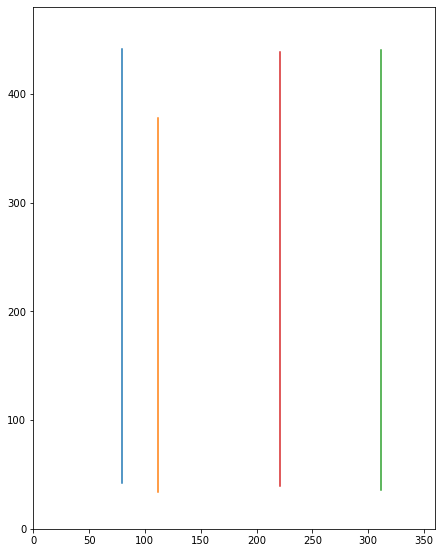

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(36/5, 48/5))

N = 4
ymin = 20
ymax = HEIGHT - ymin

np.random.seed(sum([ord(e) for e in list('Falling debris 02')]))
x = np.random.random(N)*WIDTH
yo = ymin + np.random.random(N)*(HEIGHT/4 -ymin)
yi = 3*HEIGHT/4 + np.random.random(N)*(HEIGHT/4 -ymin)

for i in range(N):
    ax.plot([x[i]]*2, [HEIGHT - yo[i], HEIGHT - yi[i]])

ax.set_xlim([0, WIDTH])
ax.set_ylim([0, HEIGHT])

plt.show()

In [17]:
SVG += '  <!-- ! Falling debris 02 -->\n'
SVG += '  <g id="falling-debris02" opacity="0.5">\n'

mindur = 2
maxdur = 4

np.random.seed(sum([ord(e) for e in list('Falling debris 02')]))
for i in range(N):
    length = yi[i] - yo[i]
    space = 3 + np.random.randint(4)
    opacity = 0.25 + np.random.random()*0.5
    SVG += f'    <line x1="{x[i]:.02f}" y1="{yo[i]:.02f}" x2="{x[i]:.02f}" y2="{yi[i]:.02f}" stroke-opacity="{opacity:.02f}" stroke="white" stroke-dasharray="{length:.02f},{space*length:.02f}" stroke-width="1">\n'
    dur = mindur + np.random.random()*(maxdur - mindur)
    offset = np.random.random()*maxdur
    SVG += f'      <animate attributeName="stroke-dashoffset" values="0;-{(space + 1)*length:.02f}" dur="{dur:.02f}s" begin="-{offset:.02f}s" repeatCount="indefinite" />\n'
    SVG += f'    </line>\n'

SVG += '  </g>\n\n'

## Display SVG
---

In [18]:
SVG += f'<text x="{WIDTH - 130}" y="{HEIGHT - 10}" fill="yellow" opacity="0.25">under construction</text>\n'
SVG += '</svg>\n'

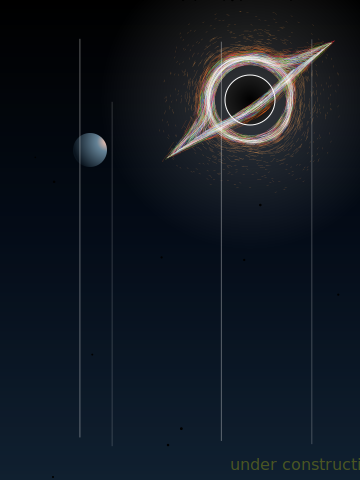

In [19]:
display_svg(SVG)

In [20]:
# print(SVG)

## Export SVG
---

In [21]:
# export_svg(SVG, 'image')